# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK OUTLINER
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: OBSERVATION AND CONCLUSION

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter("ignore")

#for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_{train|test}.csv**

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


In [6]:
application_test = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_test.csv'), index_col=0)

In [7]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / seco

In [8]:
print('-'*100)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*100)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)

----------------------------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 121)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
----------------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_previous_application.csv**

In [9]:
prev_app = pd.read_csv(os.path.join(path_to_data, 'dseb63_previous_application.csv'))
prev_app

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,Consumer loans,6030.675,133866.0,133866.0,0.0,133866.0,SATURDAY,15,Y,1,0.000000,NaN,NaN,XAP,Approved,-832,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Regional / Local,200,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-801.0,-111.0,-531.0,-518.0,0.0,302680
1413697,1563733,Consumer loans,13726.080,137250.0,123525.0,13725.0,137250.0,SATURDAY,14,Y,1,0.108909,NaN,NaN,XAP,Approved,-495,Cash through the bank,XAP,NaN,New,Audio/Video,POS,XNA,Stone,154,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-464.0,-194.0,-194.0,-186.0,0.0,192560
1413698,2319569,Consumer loans,4716.495,46800.0,46800.0,0.0,46800.0,FRIDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-160,Cash through the bank,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Regional / Local,50,Construction,12.0,middle,POS industry with interest,365243.0,-119.0,211.0,365243.0,365243.0,0.0,91682
1413699,2829648,Consumer loans,10301.940,101745.0,112491.0,0.0,101745.0,FRIDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-560,Cash through the bank,XAP,NaN,New,Consumer Electronics,POS,XNA,Regional / Local,140,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-529.0,-199.0,-199.0,-194.0,0.0,126653


In [10]:
column_to_move = 'SK_ID_CURR'  

# Get a list of column names excluding the column to move
other_columns = [col for col in prev_app .columns if col != column_to_move]

# Reorder the columns with the column to move in the second position
prev_app = prev_app[other_columns[:1] + [column_to_move] + other_columns[1:]]

# Display the updated DataFrame
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,293189,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,1696966,293189,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,2154916,293189,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0
3,2802425,91587,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
4,1536272,91587,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0


In [11]:
prev_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   SK_ID_CURR                   1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1106483 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413700 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [12]:
prev_app.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1413701.0,1.922744e+06,532715.335255,1.000001e+06,1.461346e+06,1.922698e+06,2.384012e+06,2845381.000
SK_ID_CURR,1413701.0,1.537647e+05,88673.919865,0.000000e+00,7.692000e+04,1.536860e+05,2.305300e+05,307510.000
AMT_ANNUITY,1106483.0,1.583718e+04,14724.906897,0.000000e+00,6.257858e+03,1.122376e+04,2.042078e+04,418058.145
AMT_APPLICATION,1413701.0,1.752436e+05,293622.193141,0.000000e+00,1.975050e+04,7.087050e+04,1.800000e+05,5850000.000
AMT_CREDIT,1413700.0,1.963541e+05,319481.250716,0.000000e+00,2.488050e+04,8.059500e+04,2.156400e+05,4509688.500
AMT_DOWN_PAYMENT,664161.0,6.655317e+03,20620.300440,-9.000000e-01,0.000000e+00,1.791000e+03,7.695000e+03,3060045.000
AMT_GOODS_PRICE,1094176.0,2.264512e+05,315937.604200,0.000000e+00,4.982850e+04,1.102455e+05,2.295000e+05,5850000.000
HOUR_APPR_PROCESS_START,1413701.0,1.247893e+01,3.331474,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1413701.0,9.964321e-01,0.059626,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,664161.0,8.017486e-02,0.107784,-1.497876e-05,0.000000e+00,6.248933e-02,1.089118e-01,1.000


In [13]:
print(f'The shape of dseb63_prev_app.csv is: {prev_app.shape}')
print('-'*90)
print(f'Number of unique SK_ID_PREV in dseb63_prev_app.csv are: {len(prev_app.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_prev_app.csv are: {len(prev_app.SK_ID_CURR.unique())}')
print('-'*90)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_prev_app.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_prev_app.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print('-'*90)

print(f'Number of duplicate values in prev_app: {prev_app.shape[0] - prev_app.duplicated().shape[0]}')


The shape of dseb63_prev_app.csv is: (1413701, 37)
------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_prev_app.csv are: 1413701
Number of unique SK_ID_CURR in dseb63_prev_app.csv are: 291057
------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_prev_app.csv are: 232826
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_prev_app.csv are: 58231
------------------------------------------------------------------------------------------
Number of duplicate values in prev_app: 0


# *1. IMBALANCE*

In [14]:
imbalance_col(prev_app)

Imbalance Ratio for column 'NAME_CONTRACT_TYPE': 0.0005
Imbalance Ratio for column 'AMT_ANNUITY': None
Imbalance Ratio for column 'AMT_APPLICATION': None
Imbalance Ratio for column 'AMT_CREDIT': None
Imbalance Ratio for column 'AMT_DOWN_PAYMENT': None
Imbalance Ratio for column 'AMT_GOODS_PRICE': None
Imbalance Ratio for column 'WEEKDAY_APPR_PROCESS_START': 0.6500
Imbalance Ratio for column 'HOUR_APPR_PROCESS_START': 1.9565
Imbalance Ratio for column 'FLAG_LAST_APPL_PER_CONTRACT': 0.0052
Imbalance Ratio for column 'NFLAG_LAST_APPL_IN_DAY': 279.2738
Imbalance Ratio for column 'RATE_DOWN_PAYMENT': 0.0000
Imbalance Ratio for column 'RATE_INTEREST_PRIMARY': None
Imbalance Ratio for column 'RATE_INTEREST_PRIVILEGED': None
Imbalance Ratio for column 'NAME_CASH_LOAN_PURPOSE': 0.0000
Imbalance Ratio for column 'NAME_CONTRACT_STATUS': 0.0257
Imbalance Ratio for column 'DAYS_DECISION': None
Imbalance Ratio for column 'NAME_PAYMENT_TYPE': 0.0011
Imbalance Ratio for column 'CODE_REJECT_REASON': 0.

##### Observations and Conclusions

'NFLAG_LAST_APPL_IN_DAY': With an imbalance ratio of 279.2738, this column has a severe class imbalance. This could potentially impact the performance of machine learning models. Consider strategies such as oversampling the minority class, undersampling the majority class, or using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

Other columns with low imbalance ratios:

'NAME_CONTRACT_TYPE': 0.0005,\
'FLAG_LAST_APPL_PER_CONTRACT': 0.0052,\
'NAME_CONTRACT_STATUS': 0.0257,\
'NAME_PAYMENT_TYPE': 0.0011,\
'CODE_REJECT_REASON': 0.0006,\
'NAME_TYPE_SUITE': 0.0045,\
'NAME_CLIENT_TYPE': 0.0015,\
'NAME_GOODS_CATEGORY': 0.0000,\
'NAME_PORTFOLIO': 0.0006,\
'CHANNEL_TYPE': 0.0007,\
'NAME_SELLER_INDUSTRY': 0.0005,\
'NAME_YIELD_GROUP': 0.1831,\
'PRODUCT_COMBINATION': 0.0089,

For these columns, the class imbalance is less severe, but it's still advisable to address it, especially if you plan to use these columns as features in a predictive model.

Columns with None as imbalance ratio:

'AMT_ANNUITY',\
'AMT_APPLICATION',\
'AMT_CREDIT',\
'AMT_DOWN_PAYMENT',\
'AMT_GOODS_PRICE',\
'RATE_INTEREST_PRIMARY',\
'RATE_INTEREST_PRIVILEGED',\
'DAYS_DECISION',\
'CNT_PAYMENT',\
'DAYS_FIRST_DRAWING',\
'DAYS_FIRST_DUE',\
'DAYS_LAST_DUE',\
'DAYS_TERMINATION',\
The absence of an imbalance ratio could be due to missing values in these columns. Handling missing data appropriately is crucial for accurate model training.

# *2. Outlier*

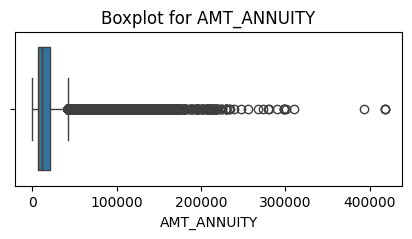

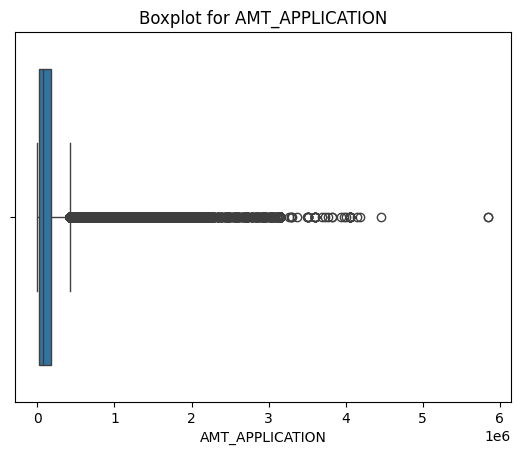

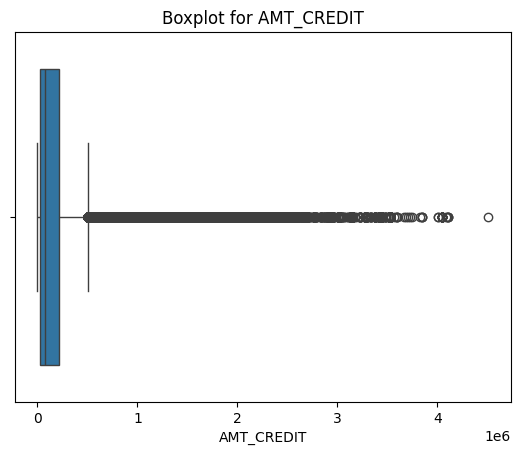

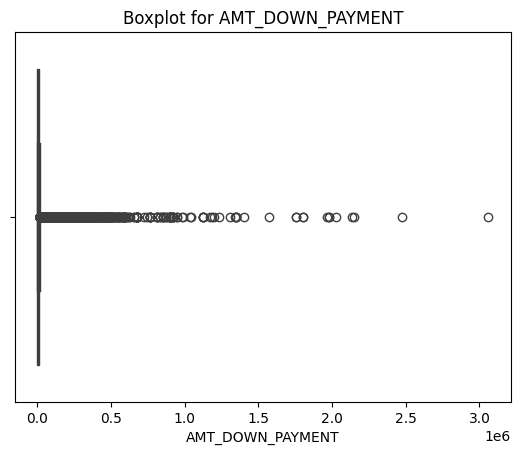

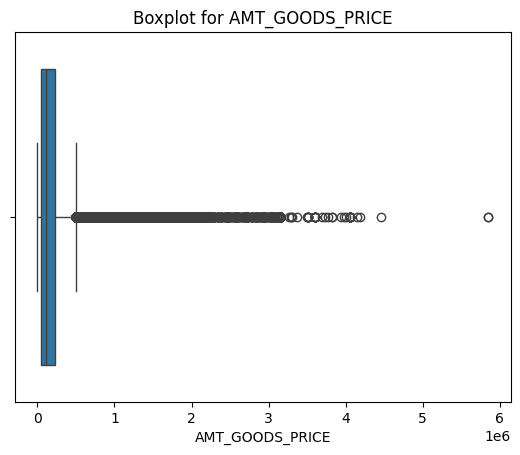

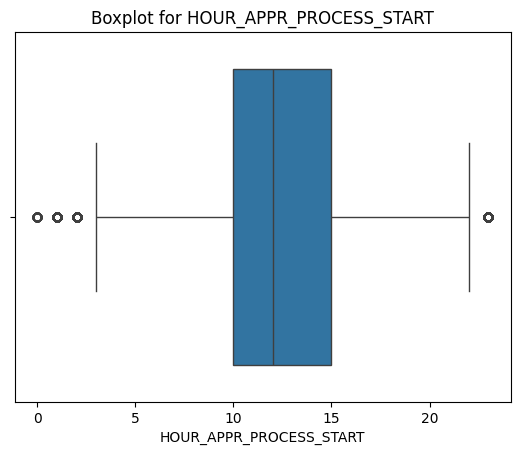

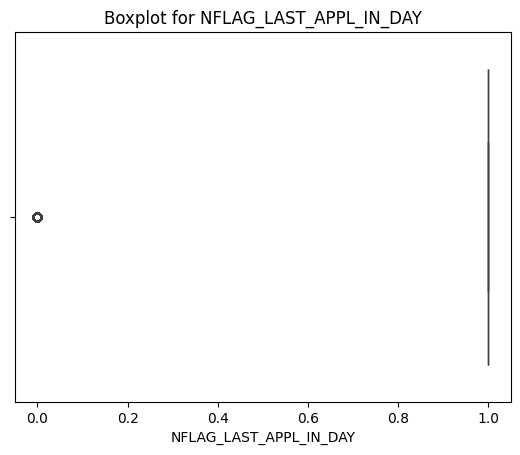

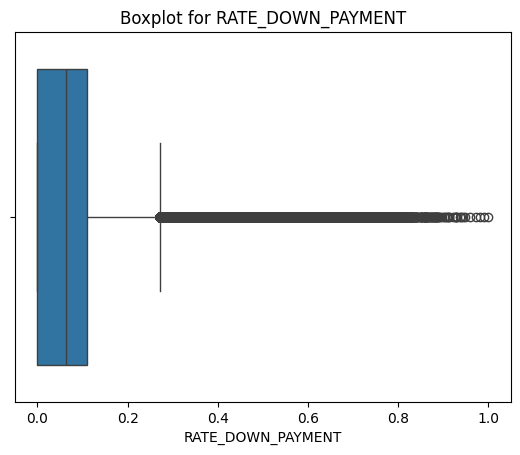

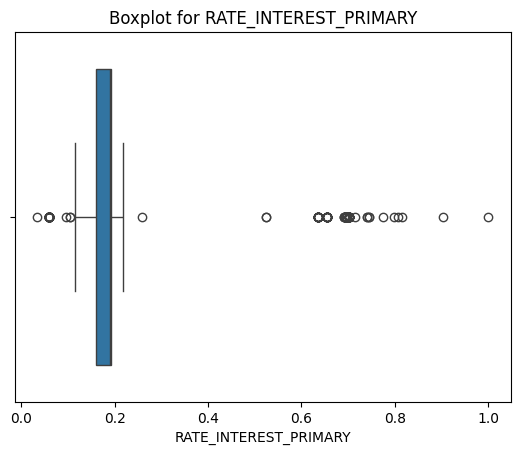

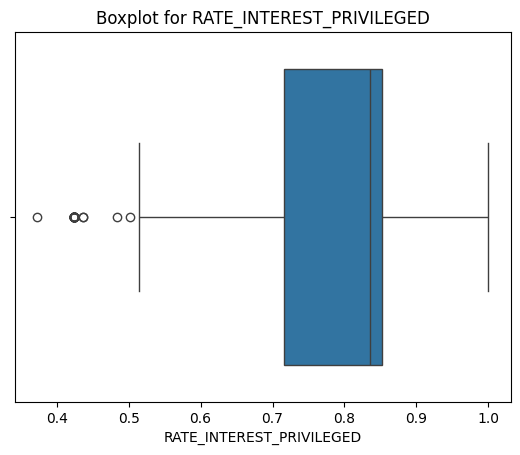

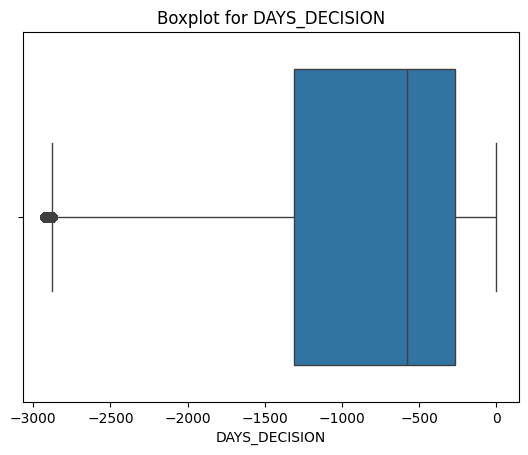

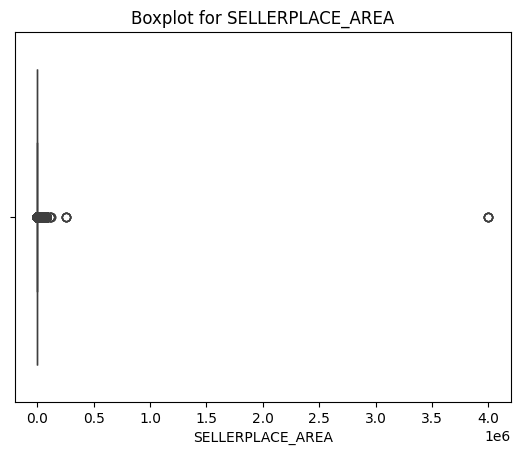

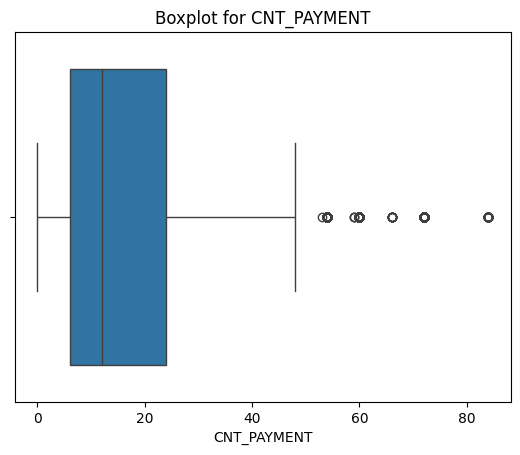

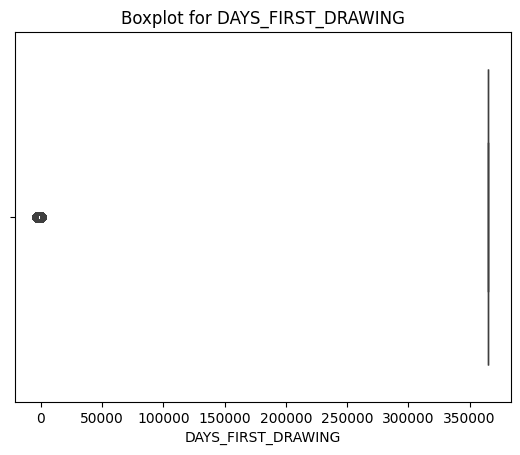

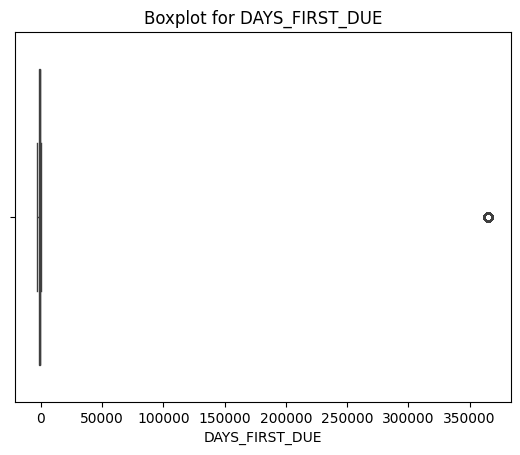

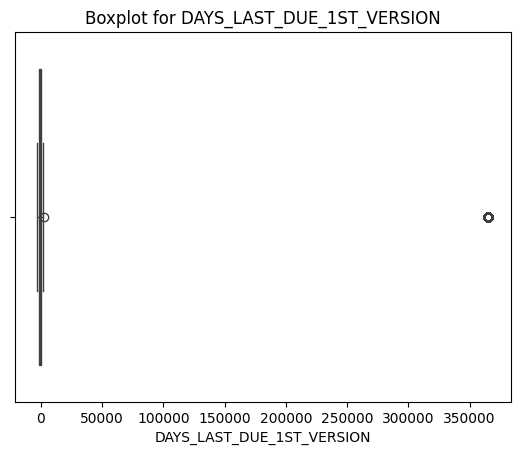

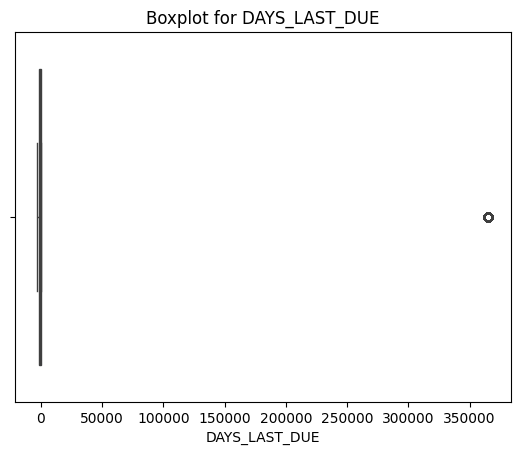

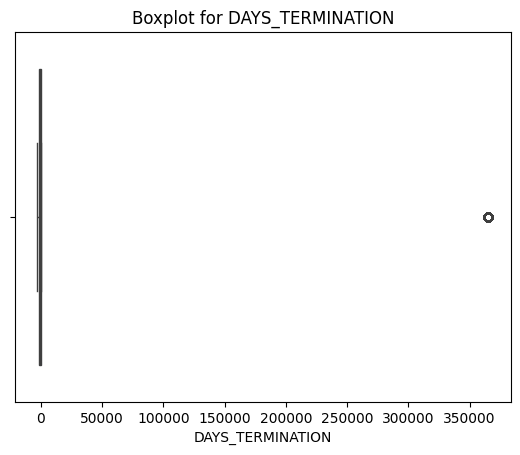

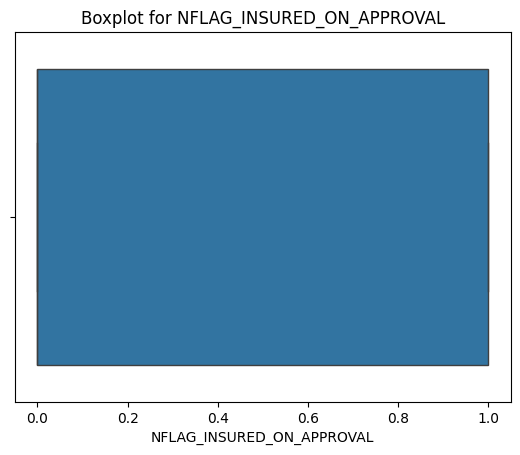

Rows with outliers:
         AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
1          68258.655        1800000.0   1754721.0          180000.0   
3          25188.615         607500.0    679671.0               NaN   
4          21709.125         450000.0    512370.0               NaN   
5           4830.930          47250.0     23688.0           24750.0   
7          11250.000              0.0    225000.0               NaN   
...              ...              ...         ...               ...   
1413692     9216.000          98010.0     97524.0            9801.0   
1413693    13281.660         125910.0    124537.5           12591.0   
1413694    78879.195         337500.0    388989.0               NaN   
1413695     3190.185          29475.0     28714.5            2947.5   
1413698     4716.495          46800.0     46800.0               0.0   

         AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
1              1800000.0                       18 

In [15]:
outlier(prev_app)

##### Observatiosn and Conclusions

Columns with potential outliers:

NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE: No information about outliers in these columns.

WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START: No information about outliers in these columns.

FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION: No information about outliers in these categorical columns.

DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION: No information about outliers in these date-related columns.

NFLAG_INSURED_ON_APPROVAL: No information about outliers in this binary column.

# *3. NaN Percentage*

In [16]:
prev_app.drop(labels=["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"],axis=1, inplace= True)
prev_app["AMT_CREDIT"].fillna(0, inplace=True)
prev_app["PRODUCT_COMBINATION"].fillna(prev_app["PRODUCT_COMBINATION"].mode()[0], inplace= True)             

In [17]:
nan_pv = nan_percent(prev_app)
nan_pv

,Column,Percentage_of_NaN
6,AMT_DOWN_PAYMENT,53.019698
12,RATE_DOWN_PAYMENT,53.019698
18,NAME_TYPE_SUITE,49.138538
30,DAYS_FIRST_DUE,39.690571
34,NFLAG_INSURED_ON_APPROVAL,39.690571
32,DAYS_LAST_DUE,39.690571
29,DAYS_FIRST_DRAWING,39.690571
33,DAYS_TERMINATION,39.690571
31,DAYS_LAST_DUE_1ST_VERSION,39.690571
7,AMT_GOODS_PRICE,22.602021


Number of columns having NaN values: 12 columns


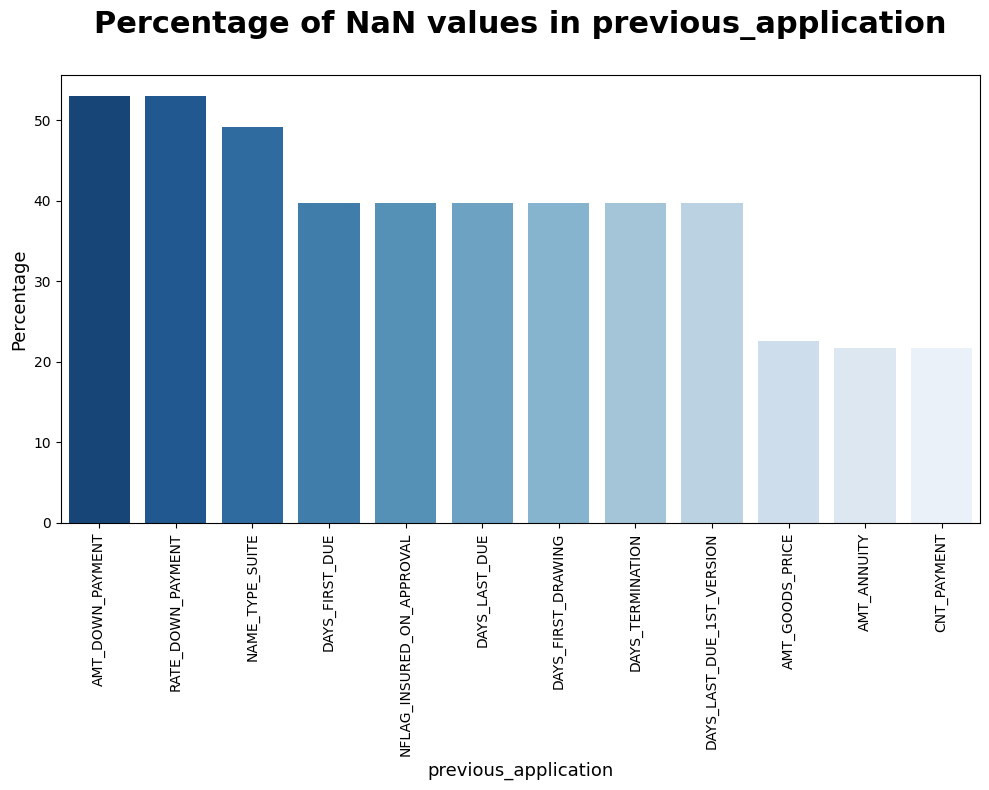

In [18]:
plot_nan_percent(nan_pv, 'previous_application', tight_layout = False, figsize = (10,8))

##### Observations and Conclusions

High Percentage of Missing Values (Greater than 20%):\
RATE_DOWN_PAYMENT: 53.02%\
AMT_DOWN_PAYMENT: 53.02%\
NAME_TYPE_SUITE: 49.14%\
DAYS_LAST_DUE, DAYS_FIRST_DRAWING, DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL: All have 39.69%\
AMT_GOODS_PRICE: 22.60%\
AMT_ANNUITY and CNT_PAYMENT: 21.73%

Columns with No Missing Values:
NAME_PORTFOLIO, PRODUCT_COMBINATION, NAME_YIELD_GROUP, NAME_SELLER_INDUSTRY, SELLERPLACE_AREA, CHANNEL_TYPE, NAME_PRODUCT_TYPE, SK_ID_PREV, NAME_GOODS_CATEGORY, NAME_CLIENT_TYPE, NAME_CONTRACT_TYPE, CODE_REJECT_REASON, NAME_PAYMENT_TYPE, DAYS_DECISION, NAME_CONTRACT_STATUS, NAME_CASH_LOAN_PURPOSE, NFLAG_LAST_APPL_IN_DAY, FLAG_LAST_APPL_PER_CONTRACT, HOUR_APPR_PROCESS_START, WEEKDAY_APPR_PROCESS_START, AMT_CREDIT, AMT_APPLICATION, SK_ID_CURR: These columns have 0% missing values.

# *4.  CATEGORICAL COLUMN*

In [19]:
cate_pv = get_category_column(prev_app)
cate_pv

,Feature,Nunique,Percentage of NaN
0,NAME_CONTRACT_TYPE,4,0.000000
1,WEEKDAY_APPR_PROCESS_START,7,0.000000
2,FLAG_LAST_APPL_PER_CONTRACT,2,0.000000
3,NAME_CASH_LOAN_PURPOSE,25,0.000000
4,NAME_CONTRACT_STATUS,4,0.000000
5,NAME_PAYMENT_TYPE,4,0.000000
6,CODE_REJECT_REASON,9,0.000000
7,NAME_TYPE_SUITE,7,49.138538
8,NAME_CLIENT_TYPE,4,0.000000
9,NAME_GOODS_CATEGORY,27,0.000000


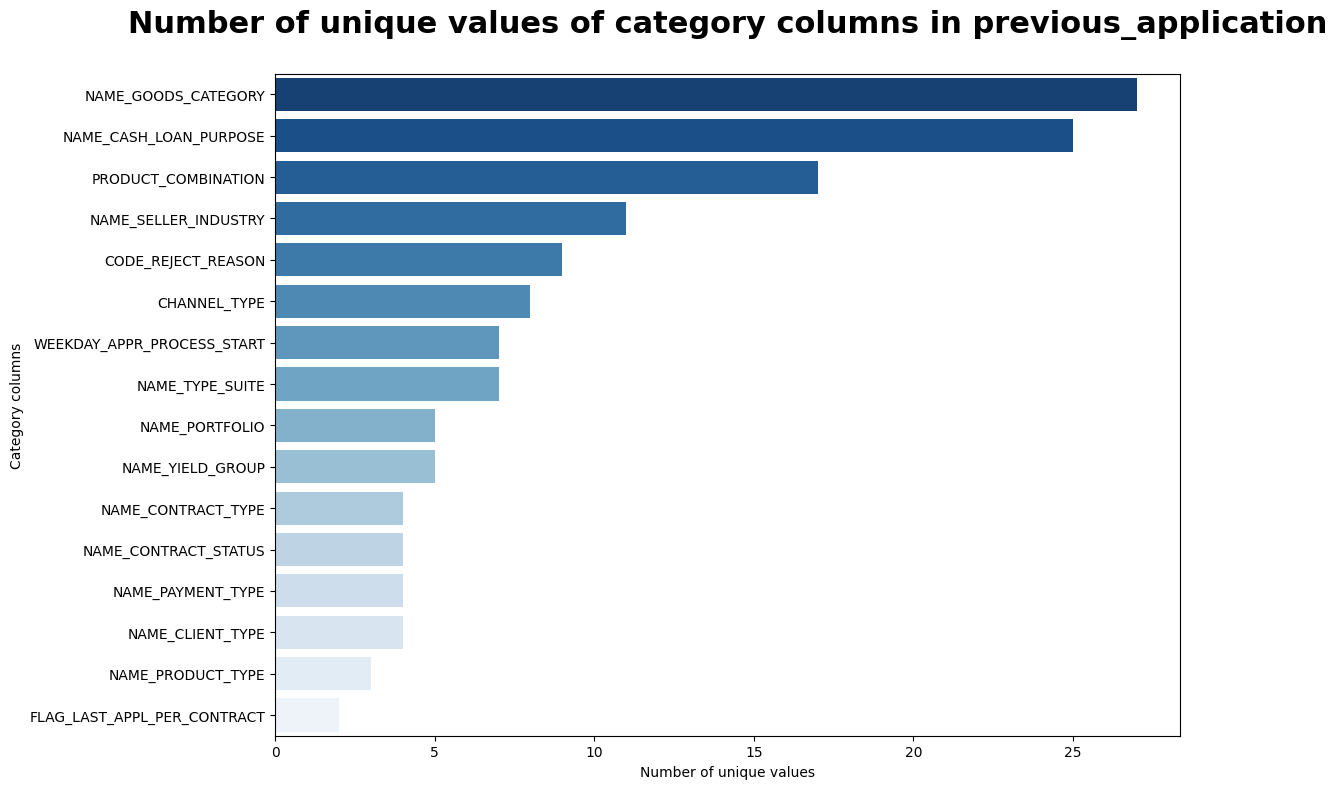

In [20]:
plot_category_column(cate_pv, 'previous_application')

##### Observations and Conclusions

- Features with No Missing Values (Percentage of NaN = 0%):\
NAME_CONTRACT_TYPE,
WEEKDAY_APPR_PROCESS_START,
FLAG_LAST_APPL_PER_CONTRACT,
NAME_CASH_LOAN_PURPOSE,
NAME_CONTRACT_STATUS,
NAME_PAYMENT_TYPE,
CODE_REJECT_REASON,
NAME_CLIENT_TYPE,
NAME_GOODS_CATEGORY,
NAME_PORTFOLIO,
NAME_PRODUCT_TYPE,
CHANNEL_TYPE,
NAME_SELLER_INDUSTRY,
NAME_YIELD_GROUP,
PRODUCT_COMBINATION
- Feature with Missing Values:\
NAME_TYPE_SUITE: This feature has 49.14% missing values. Depending on the importance of this feature for your analysis, you might consider strategies such as imputation or, if necessary, removing this feature from your analysis.
Nunique Information:
- Some features have a relatively small number of unique values, while others have a larger number.\
    - Features like FLAG_LAST_APPL_PER_CONTRACT, NAME_CLIENT_TYPE, NAME_PORTFOLIO, NAME_PRODUCT_TYPE are categorical with a small number of unique values.\
    - Features like NAME_CASH_LOAN_PURPOSE, NAME_GOODS_CATEGORY, CHANNEL_TYPE, NAME_SELLER_INDUSTRY have a higher number of unique values, indicating more diverse categories.

# *5.EDA*

### 5.1.COLLELATION

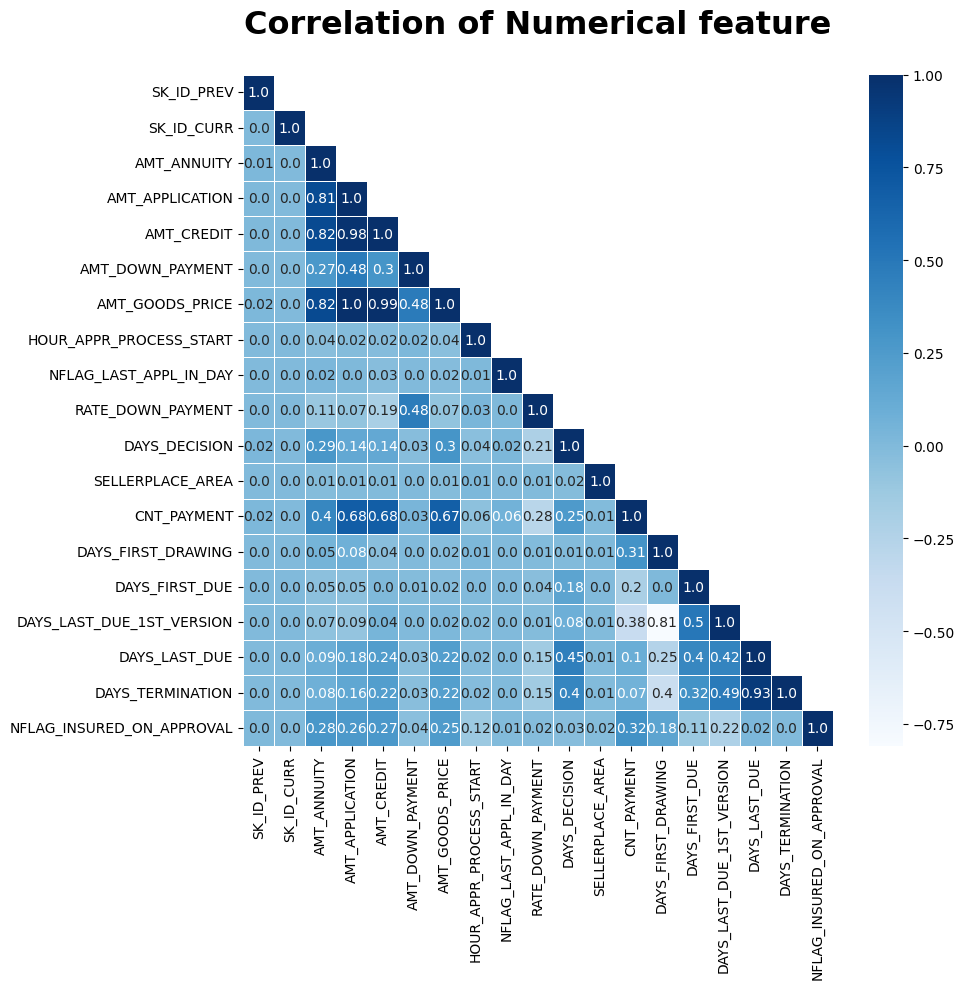

In [21]:
numeric_cor(prev_app)

"DAYS_LAST_DUE" and "DAYS_TERMINATION" highly correlated\
"DAYS_FIRST_DRAWING" and "DAYS_LAST_DUE_1ST_VERSION"\
"AMT_ANNUTY", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" are highly corrlelated\
"DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "AMT_APPLICATION", "AMT_CREDIT" and "AMT_GOODS_PRICE" can be removed to prevent collinearity

In [22]:
prev_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

#### For EDA purpose we are not removing them

In [23]:
prev_app_drop = prev_app.drop(["SK_ID_PREV"], axis=1)
prev_app_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413701 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1413701 non-n

### 5.2. Merge with application_train

In [24]:
prev_app_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], prev_app, how = 'left', on=['SK_ID_CURR'])
prev_app_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,NaN,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15.0,Y,1.0,NaN,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,NaN,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15.0,Y,1.0,NaN,XAP,Canceled,-181.0,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12.0,Y,1.0,NaN,XNA,Approved,-648.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle,NaN,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,14.0,Y,1.0,NaN,XAP,Refused,-456.0,XNA,HC,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,14.0,Y,1.0,NaN,Repairs,Refused,-171.0,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,14.0,Y,1.0,NaN,XNA,Approved,-787.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,NaN,-756.0,294.0,-66.0,-64.0,0.0


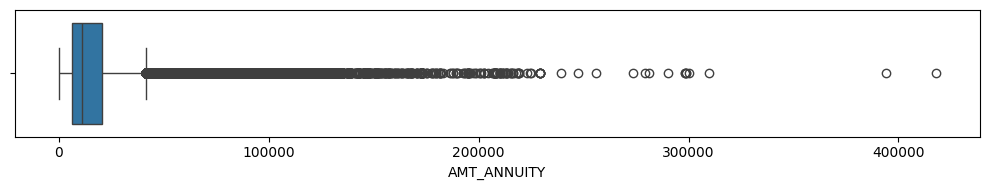

In [25]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_app_merged["AMT_ANNUITY"], orient='h')

plt.tight_layout()
plt.show()

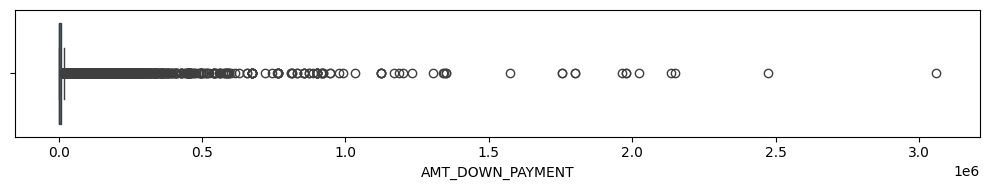

In [26]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_app_merged["AMT_DOWN_PAYMENT"], orient='h')

plt.tight_layout()
plt.show()

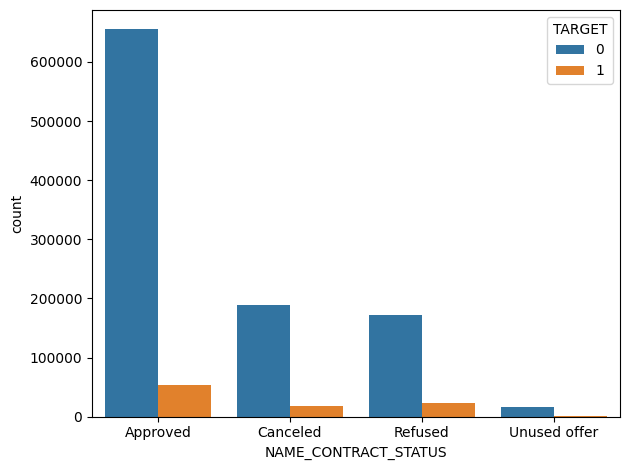

In [27]:
sns.countplot(x = prev_app_merged["NAME_CONTRACT_STATUS"], hue = prev_app_merged["TARGET"].astype('str'))

plt.tight_layout()
plt.show()

In [28]:
total_approved = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = prev_app_merged[(prev_app_merged["NAME_CONTRACT_STATUS"] == "Approved") & (prev_app_merged["TARGET"] == 1)].shape[0]

print(f"default rate of customers with successful old loans: {default_approved/total_approved * 100}")

default rate of customers with successful old loans: 7.583832968893278


In [29]:
total_refused = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = prev_app_merged[(prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused") & (prev_app_merged["TARGET"] == 0)].shape[0]

print(f"Repayment success rate of customers who were denied previous loans: {nondefault_refused/total_refused * 100}")

Repayment success rate of customers who were denied previous loans: 88.08011176488584


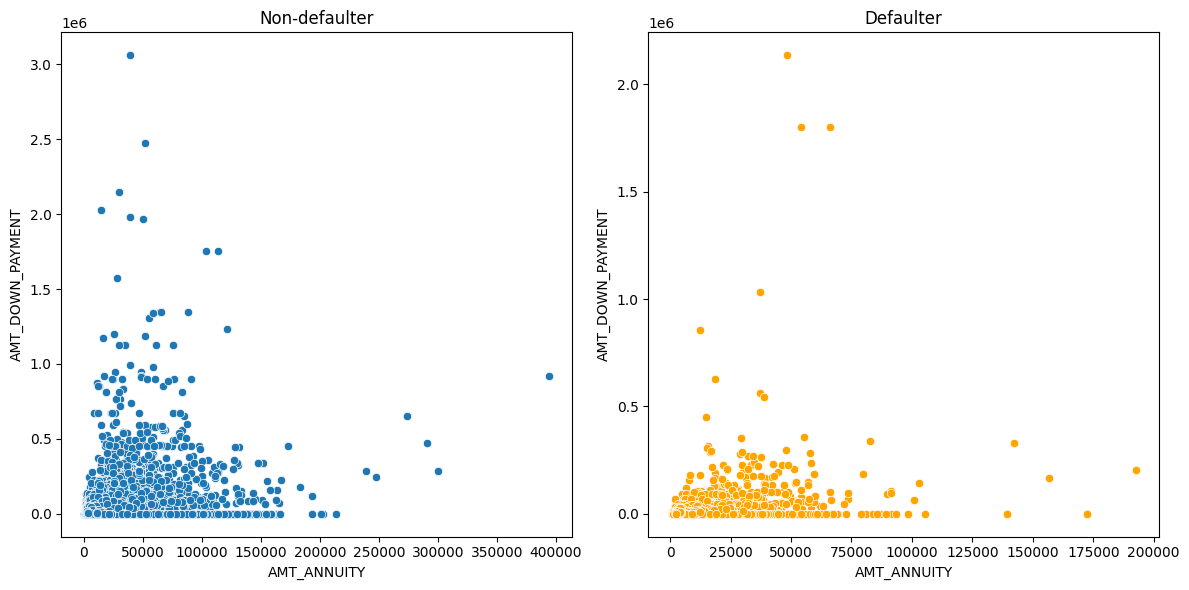

In [30]:
plot_distribution(data = prev_app_merged, column_name='AMT_ANNUITY', column_name2='AMT_DOWN_PAYMENT', plot_type='scatter')

##### The higher the AMT_ANNUITY, the lower the number of defaulters
##### The higher the DOWN_PAYMENT, the lower the number of defaulters

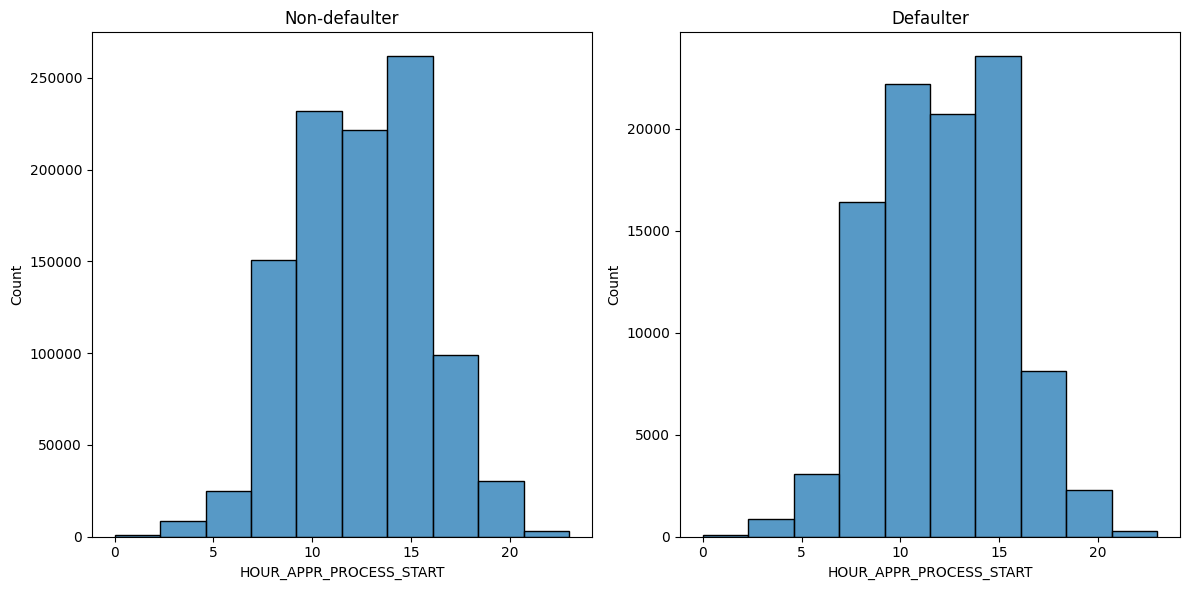

In [31]:
plot_distribution(data = prev_app_merged, column_name='HOUR_APPR_PROCESS_START', plot_type='hist', bins=10, figsize=(12,6), nrows=1, ncols=2)

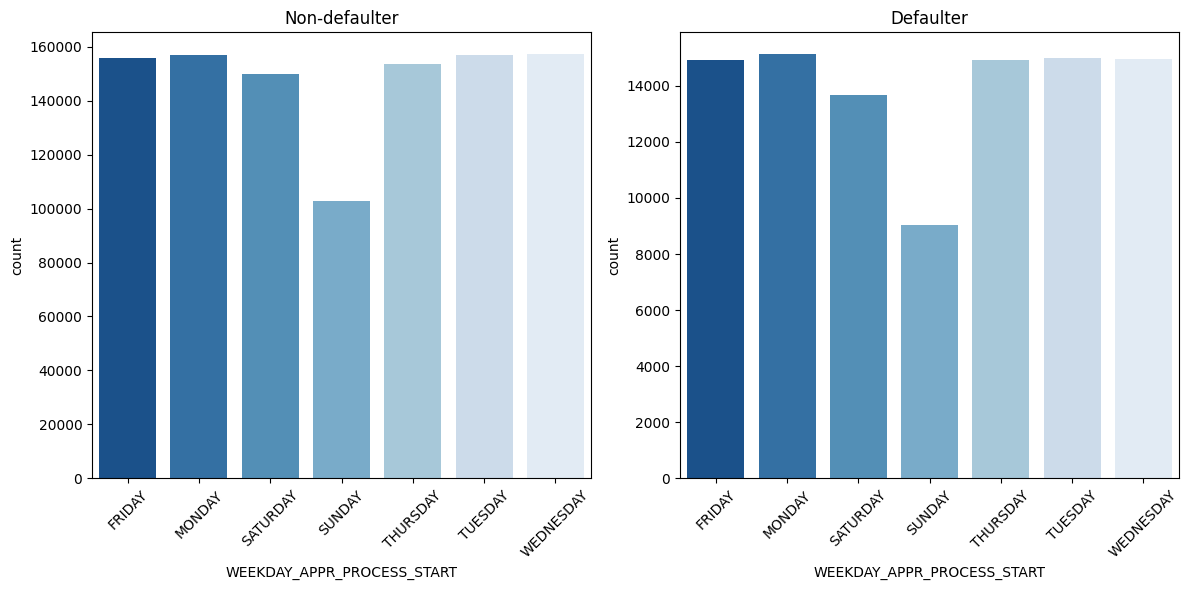

In [32]:
plot_distribution(data = prev_app_merged, column_name='WEEKDAY_APPR_PROCESS_START', plot_type='count', sort_values=True)

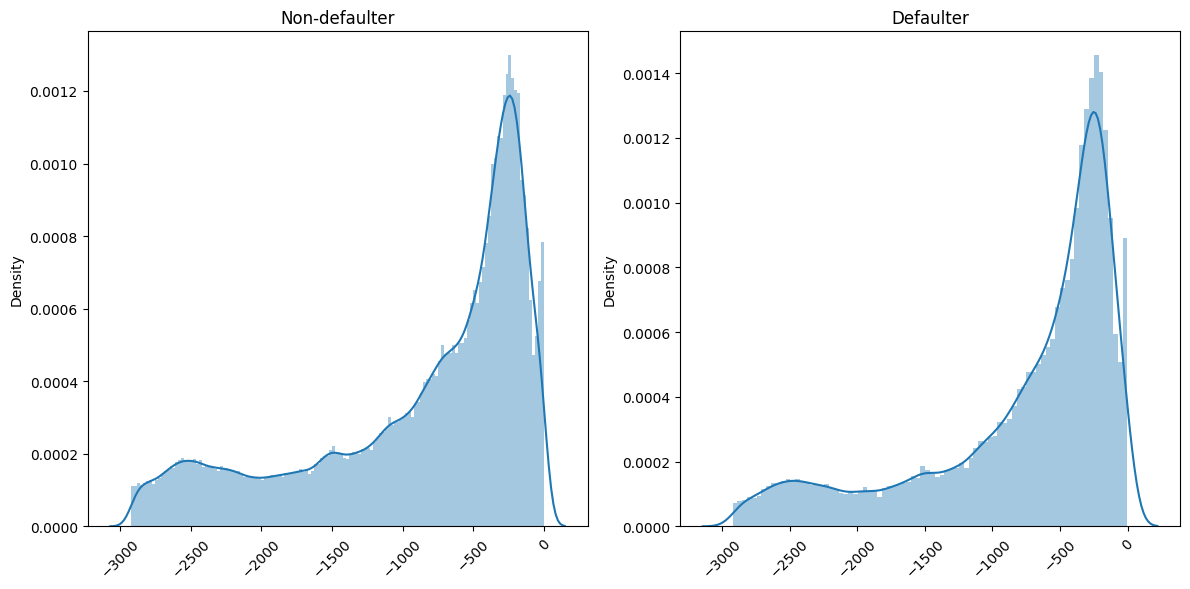

In [33]:
plot_distribution(data = prev_app_merged, column_name='DAYS_DECISION', plot_type='dist', sort_values=True)

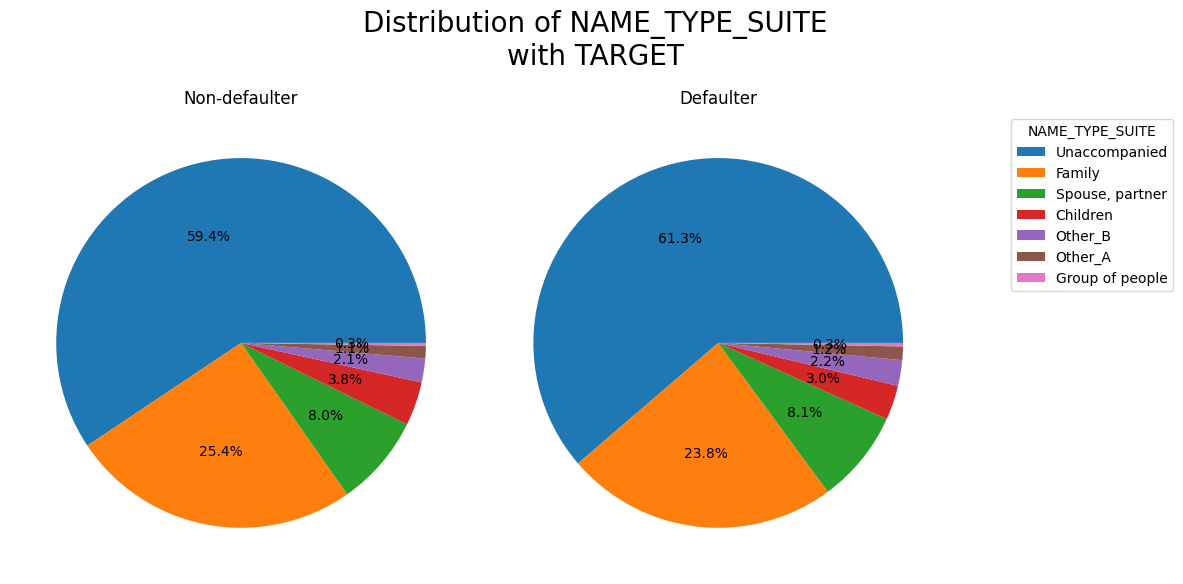

In [34]:
categories_pie_plot(data= prev_app_merged, x = "NAME_TYPE_SUITE")

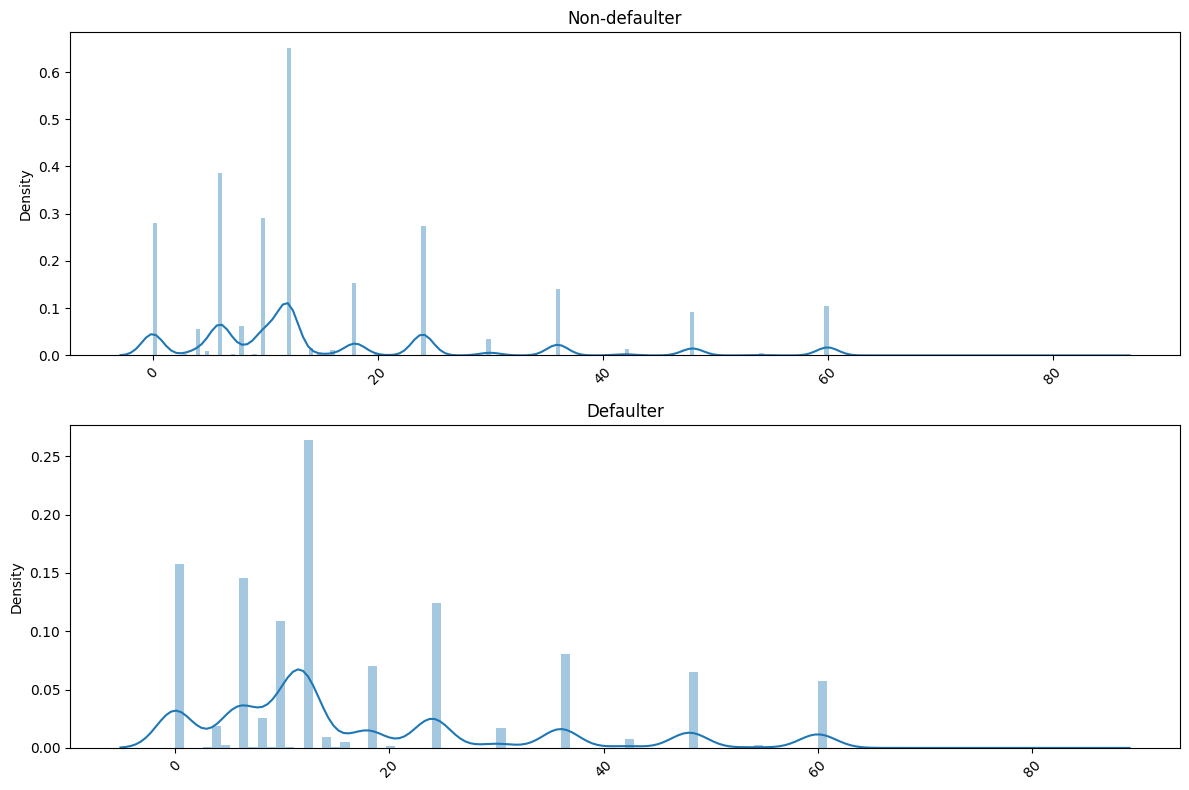

In [35]:
plot_distribution(data = prev_app_merged, column_name='CNT_PAYMENT', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

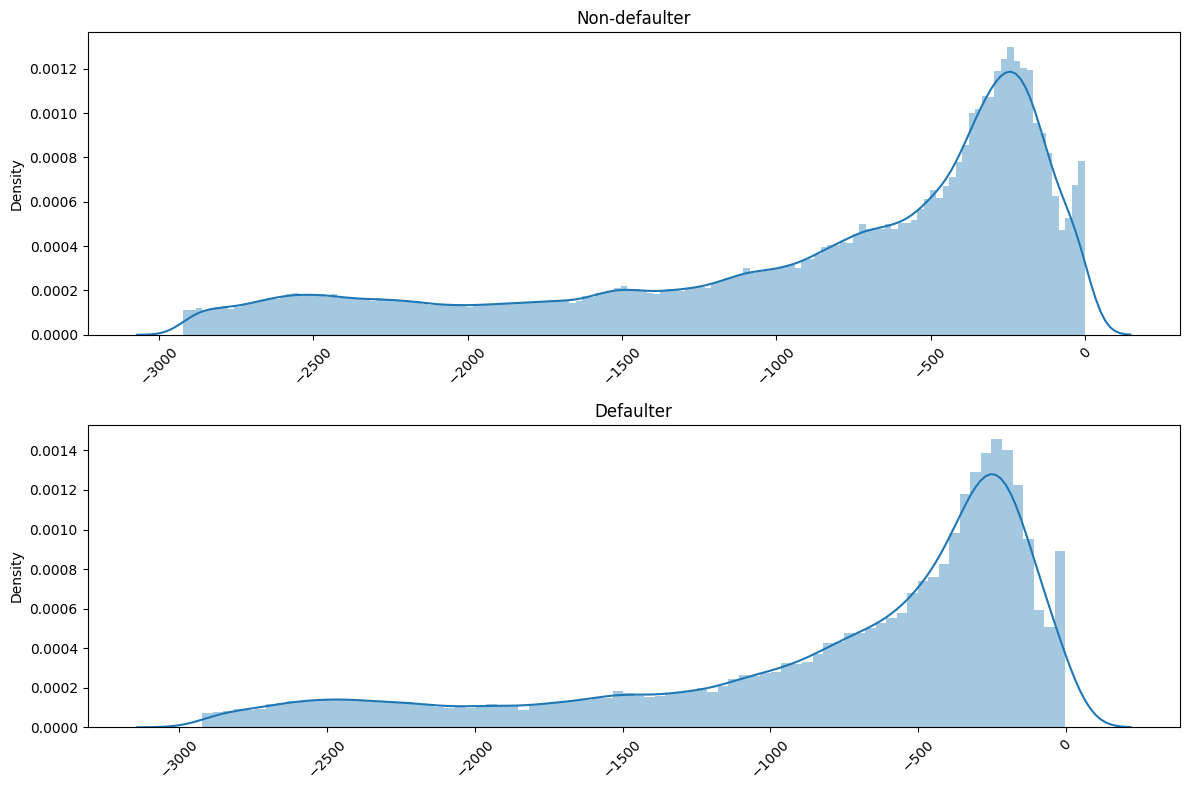

In [36]:
plot_distribution(data = prev_app_merged, column_name='DAYS_DECISION', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

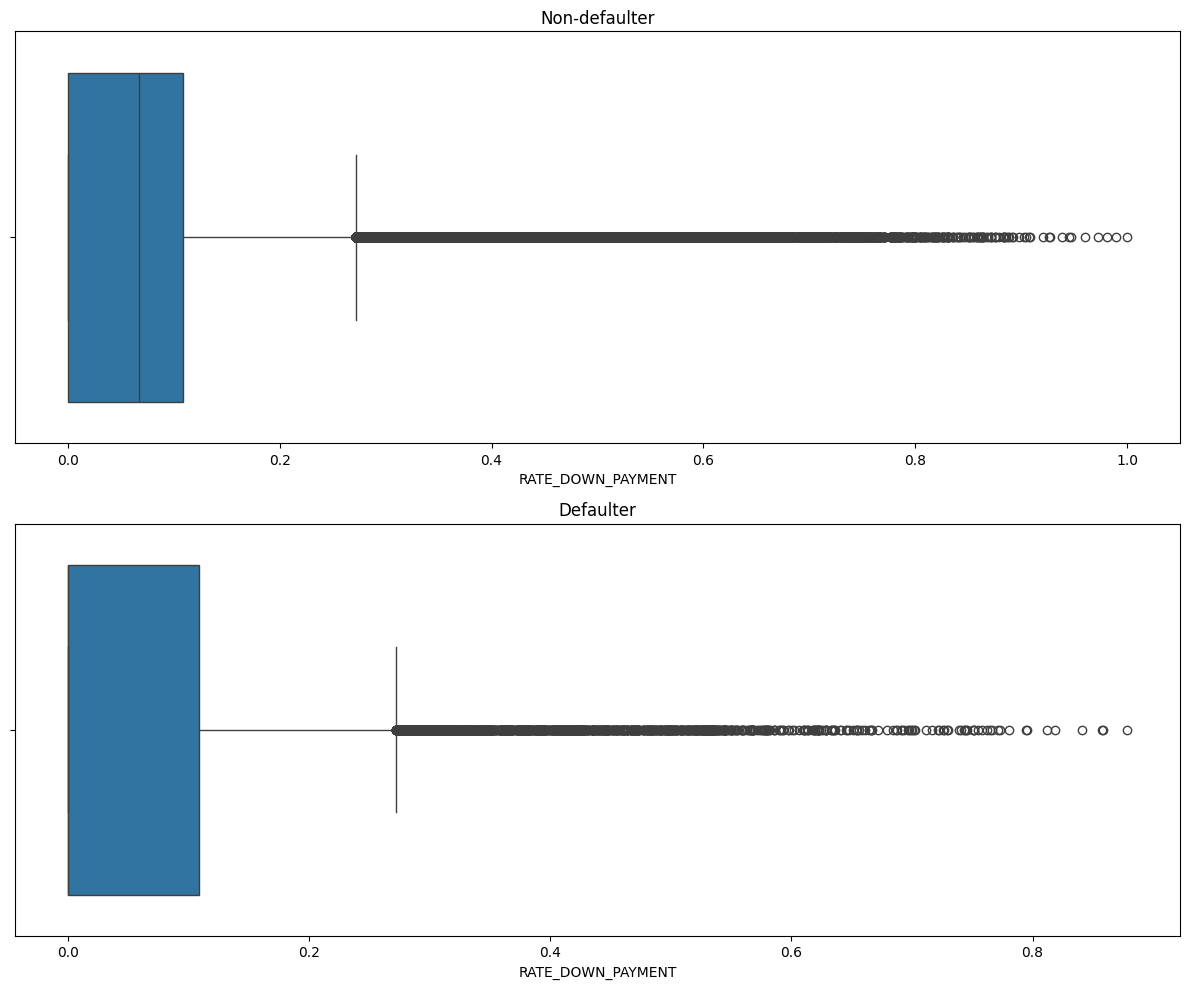

In [37]:
plot_distribution(data = prev_app_merged, column_name='RATE_DOWN_PAYMENT', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

In [38]:
print('RATE_DOWN_PAYMENT TARGET = 0 \n', prev_app_merged[prev_app_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]), '\n')
print('RATE_DOWN_PAYMENT TARGET = 1 \n',prev_app_merged[prev_app_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))

RATE_DOWN_PAYMENT TARGET = 0 
 0.50    0.067511
0.70    0.108909
0.90    0.212423
0.95    0.300528
0.99    0.523630
Name: RATE_DOWN_PAYMENT, dtype: float64 

RATE_DOWN_PAYMENT TARGET = 1 
 0.50    0.000000
0.70    0.103968
0.90    0.200064
0.95    0.238156
0.99    0.481678
Name: RATE_DOWN_PAYMENT, dtype: float64


### 5.3. Catergories

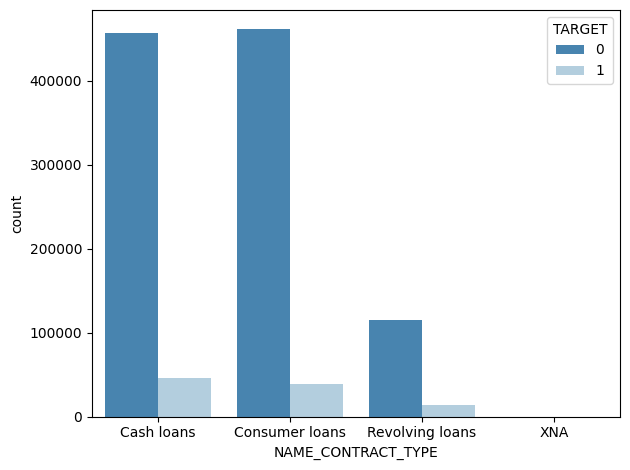

In [39]:
sns.countplot(x = prev_app_merged["NAME_CONTRACT_TYPE"], hue= prev_app_merged["TARGET"], palette= "Blues_r")
plt.tight_layout()
plt.show()

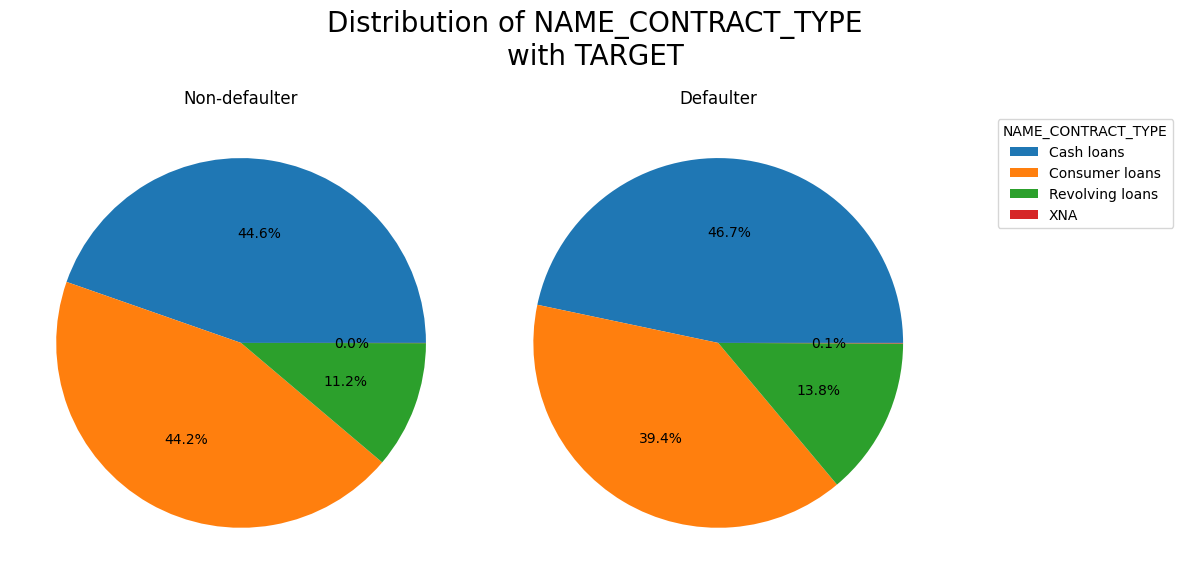

In [40]:
categories_pie_plot(prev_app_merged, "NAME_CONTRACT_TYPE")

### - Most customers take out consumer loans

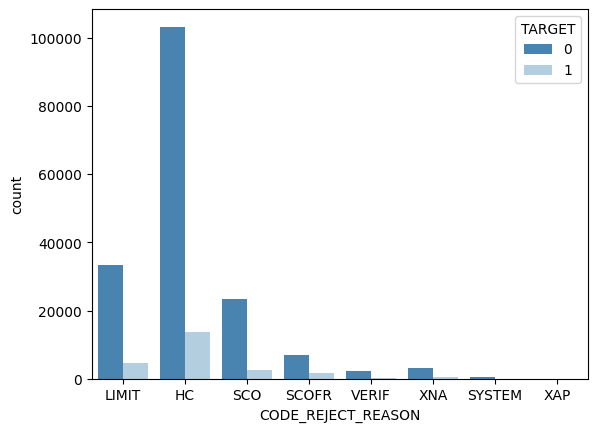

In [41]:
sns.countplot(x = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue= prev_app_merged["TARGET"], palette= "Blues_r")
plt.show()

In [42]:
prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].value_counts()

CODE_REJECT_REASON
HC        116812
LIMIT      38037
SCO        26096
SCOFR       8697
XNA         3516
VERIF       2452
SYSTEM       515
XAP            1
Name: count, dtype: int64

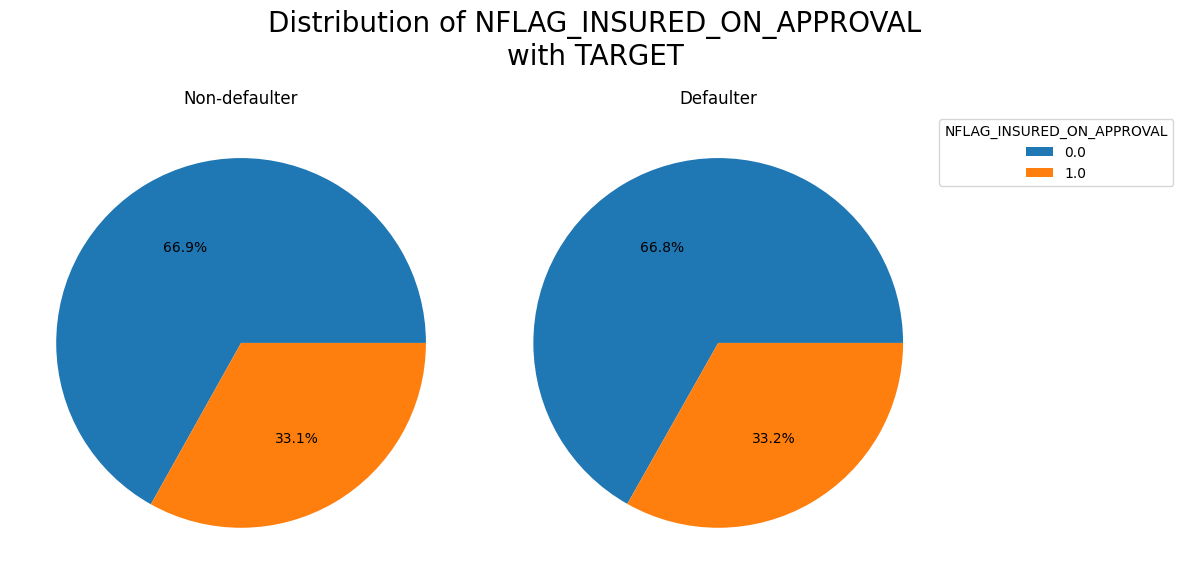

In [43]:
categories_pie_plot(prev_app_merged, 'NFLAG_INSURED_ON_APPROVAL')

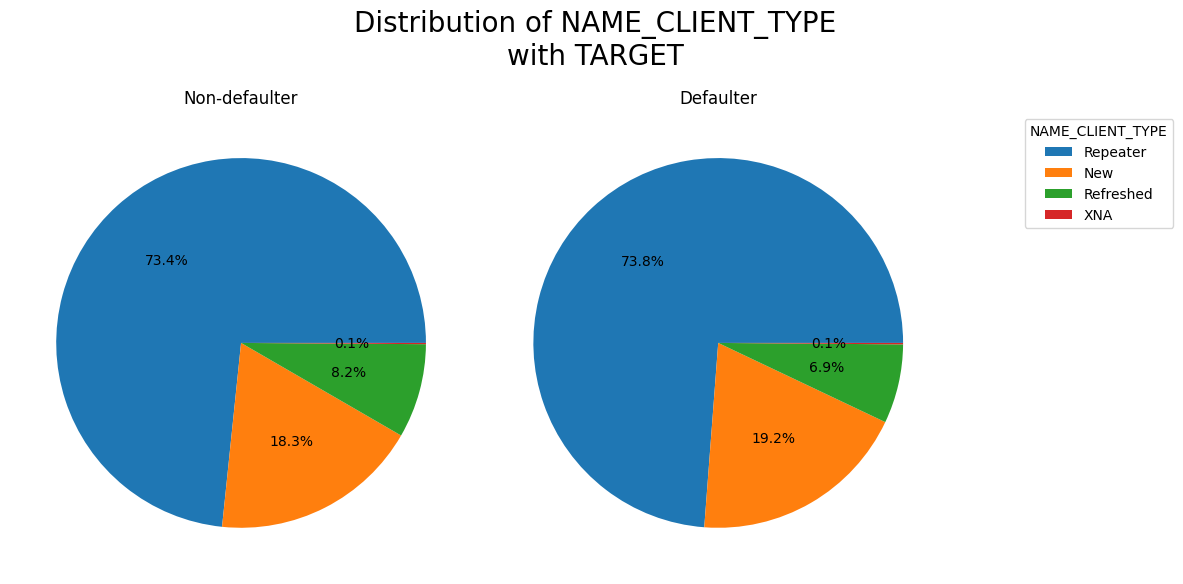

In [44]:
categories_pie_plot(prev_app_merged, "NAME_CLIENT_TYPE")

### - Most borrowers are repeaters (loyal customers).

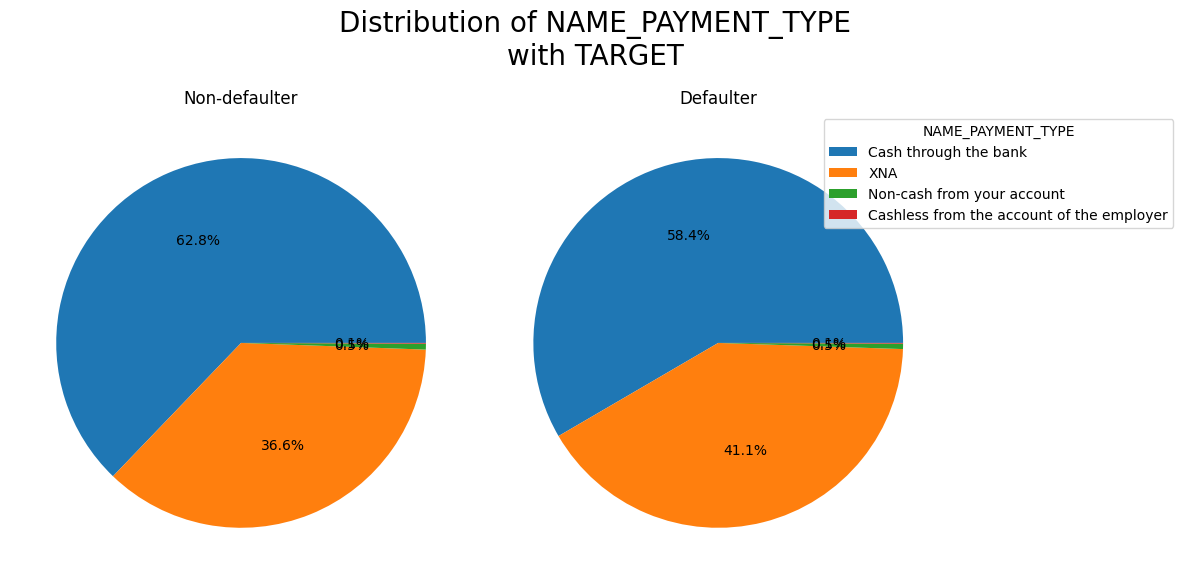

In [45]:
categories_pie_plot(prev_app_merged, "NAME_PAYMENT_TYPE")

### - Cash through bank is a widely used method

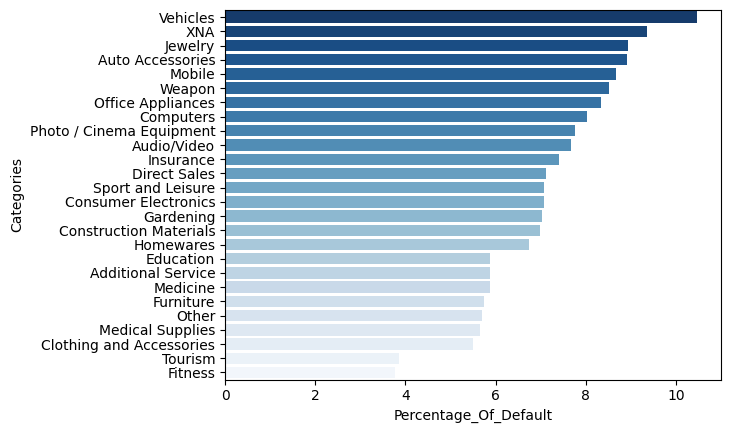

In [46]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_GOODS_CATEGORY")
sns.barplot(data= data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Vehicles has the highest debt ratio

### - XNA and car loan customers have the highest default rate

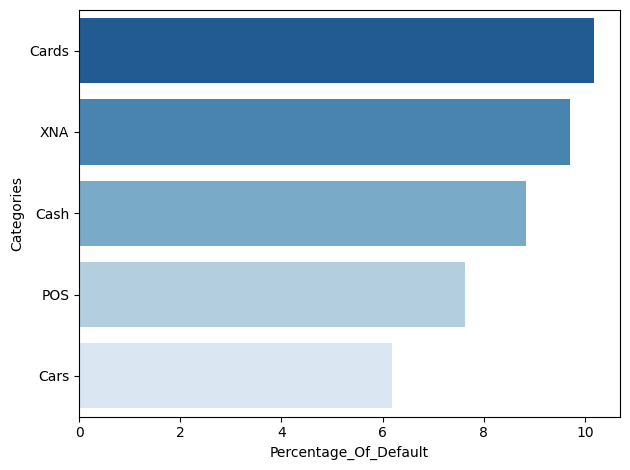

In [47]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_PORTFOLIO")
sns.barplot(data= data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")

plt.tight_layout()
plt.show()
## Cards has the highest debt ratio

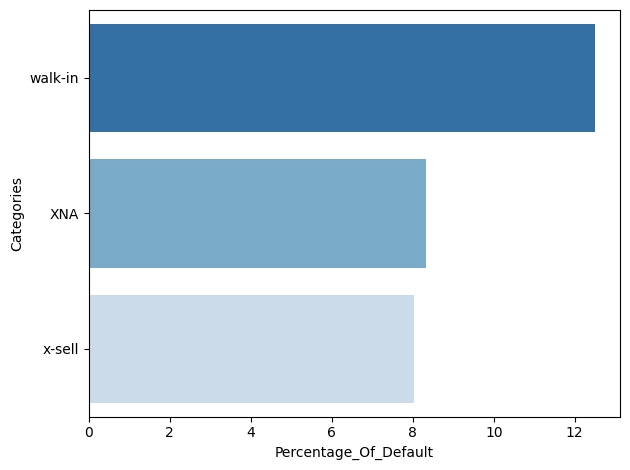

In [48]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_PRODUCT_TYPE")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.tight_layout()
plt.show()
## walk-in has the highest debt ratio

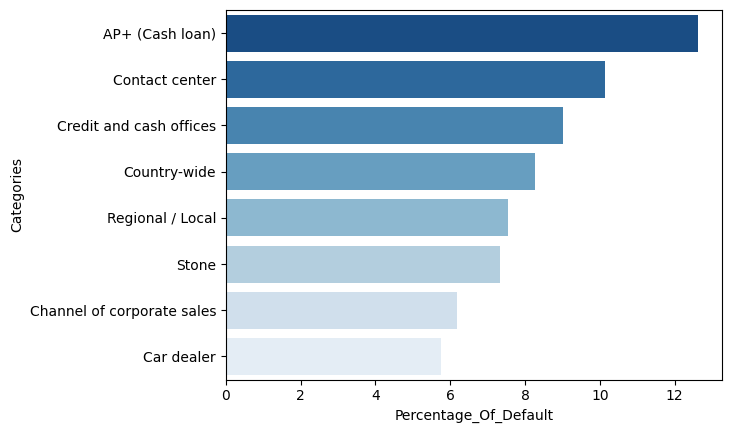

In [49]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "CHANNEL_TYPE")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## AP+ has the highest debt ratio

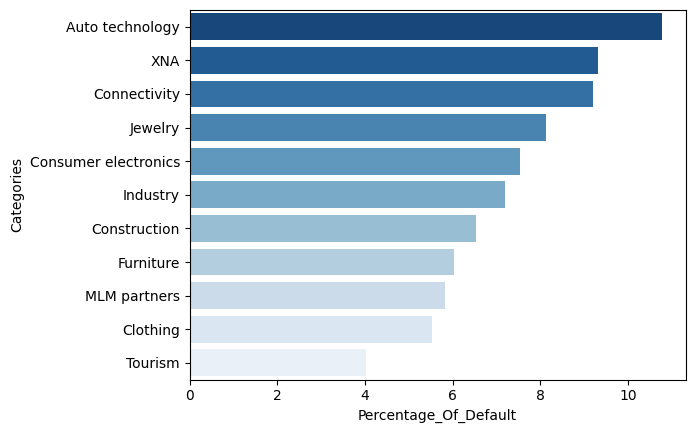

In [50]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_SELLER_INDUSTRY")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Auto technology has the highest debt ratio

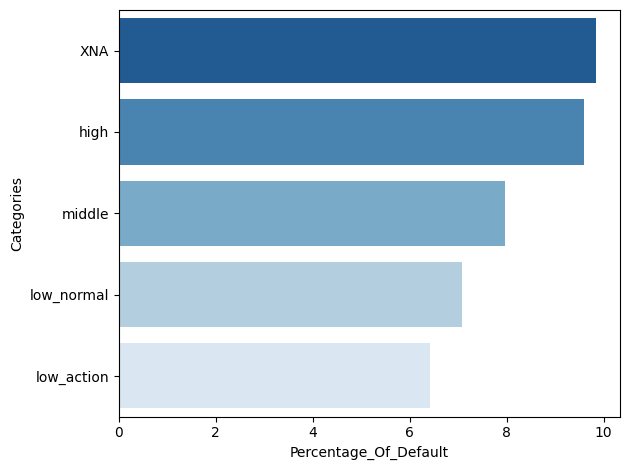

In [51]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_YIELD_GROUP")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")

plt.tight_layout()
plt.show()
## XNA has the highest debt ratio

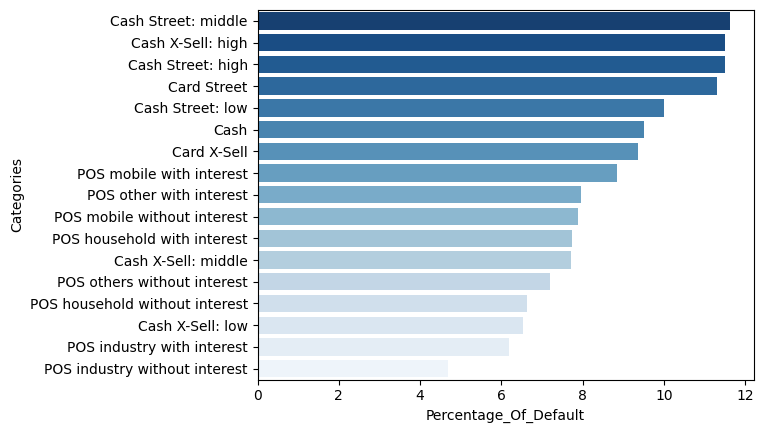

In [52]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "PRODUCT_COMBINATION")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= 'Blues_r')
plt.show()
## Cash Street: middle has the highest debt ratio

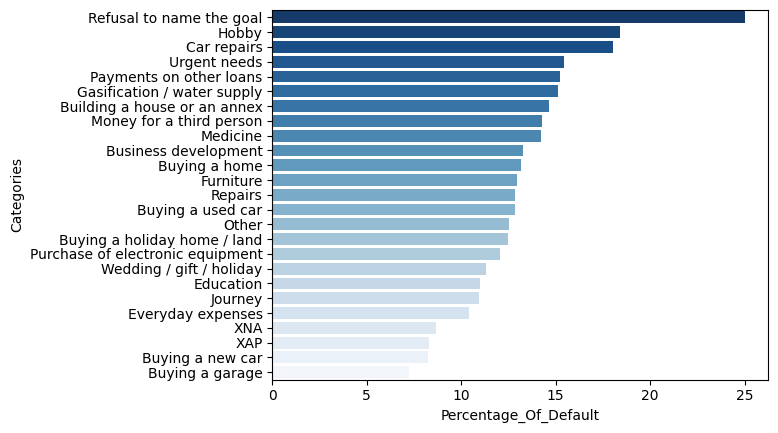

In [53]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_CASH_LOAN_PURPOSE")
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Refusal to name the goal & Hobby has the highest debt ratio

# *6.OBSERVATION AND CONCLUSION*

Imbalance Ratios: Address severe class imbalance in 'NFLAG_LAST_APPL_IN_DAY' for improved model performance.

Outliers: Evaluate potential outliers in the 'prev_app' dataset, particularly in numerical columns. Apply appropriate outlier-handling techniques.

Missing Values: High percentages of missing values in columns like 'RATE_DOWN_PAYMENT,' 'AMT_DOWN_PAYMENT,' and 'NAME_TYPE_SUITE.' Address these missing values using imputation or removal.

Category columns: Identify features with no missing values and varying unique values. Some columns have a small number of unique values, while others have more diverse categories.
